<a href="https://colab.research.google.com/github/Rakibul-CoU/Detection-and-Classification-of-Potato-leaf-diseases-using-images-based-on-multi-dimensional-CNN/blob/main/Testing_and_Validation_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [7]:
IMAGE_SIZE = 256
CHANNELS = 3

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r'/content/drive/MyDrive/Potato Disease Identification and Classification/Thesis Code/Potato/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 2683 images belonging to 5 classes.


In [9]:
train_generator.class_indices

{'Alternia_Solani': 0,
 'Potato___Early_blight': 1,
 'Potato___Late_blight': 2,
 'Potato___healthy': 3,
 'Virus': 4}

In [10]:
class_names = list(train_generator.class_indices.keys())
class_names

['Alternia_Solani',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Virus']

In [11]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.42908964 0.43301123 0.5035994 ]
  [0.4429745  0.44689608 0.5174843 ]
  [0.44705886 0.45098042 0.52156866]
  ...
  [0.47115704 0.4750786  0.55350995]
  [0.47370702 0.4776286  0.55605996]
  [0.476257   0.48017856 0.55860996]]

 [[0.42726824 0.4311898  0.50177807]
  [0.44224596 0.44616753 0.51675576]
  [0.44705886 0.45098042 0.52156866]
  ...
  [0.4901961  0.49411768 0.57254905]
  [0.4901961  0.49411768 0.57254905]
  [0.4901961  0.49411768 0.57254905]]

 [[0.4254468  0.42936838 0.4999566 ]
  [0.44151738 0.44543895 0.5160272 ]
  [0.44705886 0.45098042 0.52156866]
  ...
  [0.48902833 0.4929499  0.5713813 ]
  [0.48866403 0.4925856  0.57101697]
  [0.48829973 0.4922213  0.5706527 ]]

 ...

 [[0.4563678  0.45244622 0.5073482 ]
  [0.4621963  0.45827472 0.5131767 ]
  [0.46802482 0.46410325 0.5190052 ]
  ...
  [0.55334896 0.5494274  0.6121725 ]
  [0.57765514 0.57373357 0.63647866]
  [0.55280477 0.5488832  0.6116283 ]]

 [[0.44403175 0.44011018 0.49501213]
  [0.44002464 0.43610308 0.49100503]


In [12]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        r'/content/drive/MyDrive/Potato Disease Identification and Classification/Thesis Code/Potato/valid',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1735 images belonging to 5 classes.


In [13]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        r'/content/drive/MyDrive/Potato Disease Identification and Classification/Thesis Code/Potato/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2683 images belonging to 5 classes.


In [14]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [15]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

total trainable images/batch

In [18]:
2683/32

83.84375

In [19]:
1735/32

54.21875

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=83,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=54,
    verbose=1,
    epochs=20,
)

Epoch 1/20
83/83 [==============================] - 1146s 14s/step - loss: 1.1481 - accuracy: 0.4719 - val_loss: 0.4237 - val_accuracy: 0.8617
Epoch 2/20
83/83 [==============================] - 382s 5s/step - loss: 0.3308 - accuracy: 0.8702 - val_loss: 0.1745 - val_accuracy: 0.9398
Epoch 3/20
83/83 [==============================] - 391s 5s/step - loss: 0.2577 - accuracy: 0.9053 - val_loss: 0.1670 - val_accuracy: 0.9462
Epoch 4/20
83/83 [==============================] - 391s 5s/step - loss: 0.1495 - accuracy: 0.9445 - val_loss: 0.0632 - val_accuracy: 0.9821
Epoch 5/20
83/83 [==============================] - 394s 5s/step - loss: 0.1586 - accuracy: 0.9419 - val_loss: 0.0950 - val_accuracy: 0.9601
Epoch 6/20
83/83 [==============================] - 391s 5s/step - loss: 0.1050 - accuracy: 0.9596 - val_loss: 0.0402 - val_accuracy: 0.9890
Epoch 7/20
83/83 [==============================] - 391s 5s/step - loss: 0.0429 - accuracy: 0.9853 - val_loss: 0.0748 - val_accuracy: 0.9734
Epoch 8/20


In [21]:
scores = model.evaluate(test_generator)

84/84 [==============================] - 515s 6s/step - loss: 0.0310 - accuracy: 0.9903


Testing Accuracy

In [22]:
scores

[0.03100777231156826, 0.9903093576431274]

In [23]:
history

In [24]:
history.params

{'epochs': 20, 'steps': 83, 'verbose': 1}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
type(history.history['loss'])

list

In [27]:
len(history.history['loss'])

20

In [28]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.1481207609176636,
 0.3308218717575073,
 0.2576903700828552,
 0.14953620731830597,
 0.15864315629005432]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [30]:
val_acc

[0.8616898059844971,
 0.9398148059844971,
 0.9461805820465088,
 0.9820601940155029,
 0.9600694179534912,
 0.9890046119689941,
 0.9733796119689941,
 0.9866898059844971,
 0.9924768805503845,
 0.9884259104728699,
 0.9670138955116272,
 0.9820601940155029,
 0.9959490895271301,
 0.9884259104728699,
 0.9976851940155029,
 0.9988425970077515,
 0.9913194179534912,
 0.9942129850387573,
 0.9716435074806213,
 0.9965277910232544]

In [31]:
acc

[0.4718973934650421,
 0.8702376484870911,
 0.9053187370300293,
 0.9445492029190063,
 0.9419087171554565,
 0.9596378803253174,
 0.9852885603904724,
 0.9792531132698059,
 0.9867974519729614,
 0.9932101368904114,
 0.9686910510063171,
 0.9867974519729614,
 0.9849113821983337,
 0.9901923537254333,
 0.9883062839508057,
 0.9966050386428833,
 0.9894379377365112,
 0.9969822764396667,
 0.9830252528190613,
 0.9773670434951782]

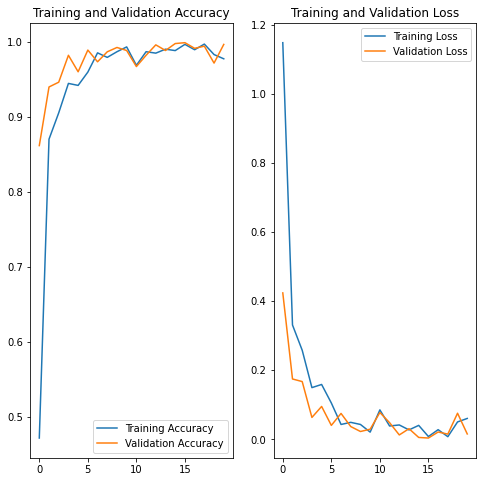

In [32]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Virus
predicted label: Virus


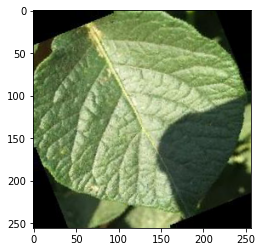

In [34]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

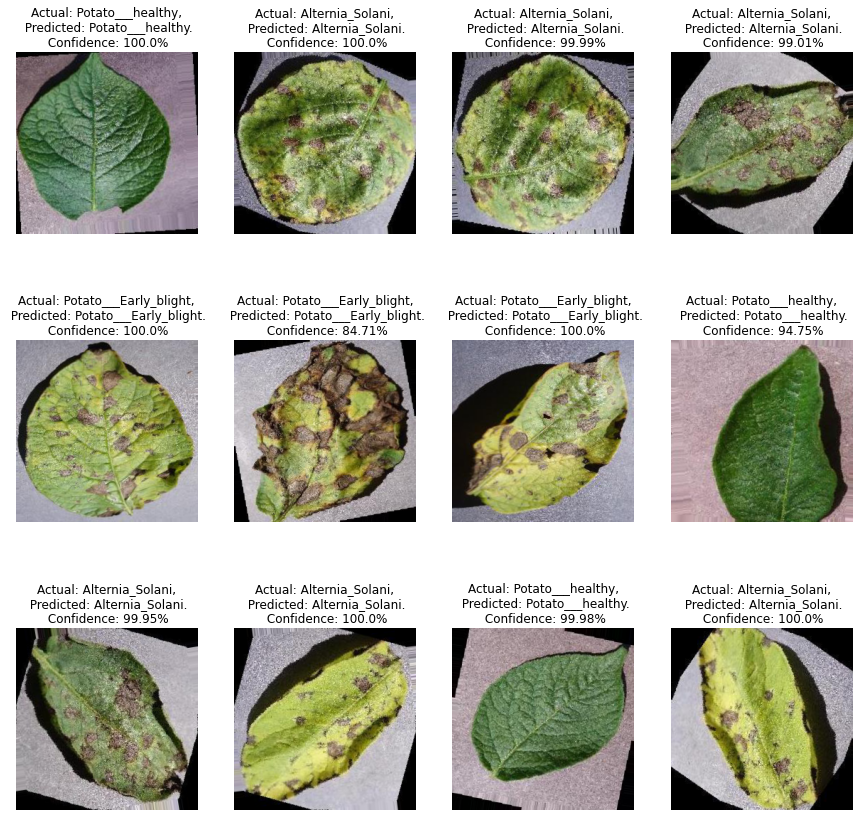

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break